# Mesure de la constante de temps d'un circuit $RC$ série

## 1. Lecture des mesures

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
# Lit le fichier de mesures et le stocke dans des tableaux
from pduino import lit_fichier

t, E, uc = lit_fichier('charge.csv')
print(uc[:5])

In [2]:
# autre méthode de récupération des données en utilisant la fonction liste_valeurs de pduino
t = [0.0, 0.142, 0.284, 0.426, 0.568, 0.71, 0.852, 0.994, 1.136, 1.278, 1.42, 1.562, 1.704, 
     1.846, 1.988, 2.13, 2.272, 2.414, 2.556, 2.698, 2.84, 2.982, 3.124, 3.266, 3.408, 3.55, 
     3.692, 3.834, 3.976, 4.118, 4.26, 4.402, 4.544, 4.686, 4.828, 4.971, 5.113, 5.255, 5.397, 
     5.539, 5.681, 5.824, 5.966, 6.108, 6.251, 6.393, 6.535, 6.677, 6.819, 6.961]
E = [4.975562072336266, 4.980449657869013, 4.980449657869013, 4.9853372434017595, 4.9853372434017595, 
     4.9853372434017595, 4.9853372434017595, 4.990224828934506, 4.990224828934506, 4.990224828934506, 
     4.995112414467253, 4.990224828934506, 4.990224828934506, 4.995112414467253, 4.995112414467253, 
     5.0, 4.995112414467253, 5.0, 4.995112414467253, 4.990224828934506, 5.0, 4.995112414467253, 
     4.995112414467253, 4.995112414467253, 5.0, 4.995112414467253, 5.0, 4.990224828934506, 
     5.0, 4.995112414467253, 5.0, 5.0, 5.0, 5.0, 4.995112414467253, 5.0, 4.995112414467253, 
     5.0, 4.995112414467253, 5.0, 5.0, 4.995112414467253, 5.0, 5.0, 4.995112414467253, 4.995112414467253, 
     4.995112414467253, 5.0, 4.995112414467253, 5.0]
uc = [0.004887585532746823, 0.6451612903225806, 1.187683284457478, 1.6715542521994136, 2.0772238514173997, 
      2.434017595307918, 2.7565982404692084, 3.0303030303030303, 3.264907135874878, 3.484848484848485, 
      3.665689149560117, 3.8269794721407626, 3.9687194525904204, 4.095796676441838, 4.198435972629521, 
      4.301075268817204, 4.3841642228739, 4.452590420332355, 4.530791788856305, 4.574780058651027, 
      4.628543499511242, 4.667644183773216, 4.711632453567938, 4.736070381231672, 4.775171065493646, 
      4.79960899315738, 4.819159335288368, 4.843597262952102, 4.858260019550342, 4.872922776148583, 
      4.887585532746823, 4.897360703812317, 4.9071358748778104, 4.9315738025415445, 4.921798631476051, 
      4.936461388074291, 4.956011730205279, 4.946236559139785, 4.951124144672532, 4.951124144672532, 
      4.9608993157380255, 4.9608993157380255, 4.965786901270772, 4.975562072336266, 4.975562072336266, 
      4.975562072336266, 4.975562072336266, 4.9853372434017595, 4.9853372434017595, 4.9853372434017595]

In [3]:
# calcul de ur (on pourrait aussi utiliser numpy)
ur = [e-uc for e, uc in zip(E, uc)]

## 2. Représentation graphique des données

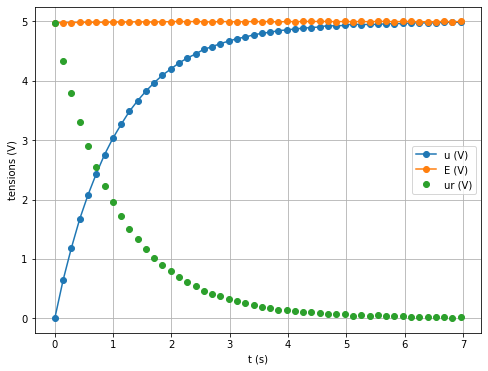

In [4]:
fig_c = plt.figure("Charge d'un condensateur", figsize=(8,6))
plt.plot(t, uc, marker = 'o', label = 'u (V)')
plt.plot(t, E, marker = 'o', label = 'E (V)')
plt.plot(t, ur, marker = 'o', linestyle='', label = 'ur (V)')
plt.grid()
plt.xlabel('t (s)')
plt.ylabel ('tensions (V)')
plt.legend()
plt.show()

## 3. Mesure de $\tau$

###  $1^{ère}$ méthode : à $t = \tau \; , 63 \%$ du saut de tension a eu lieu

In [5]:
# on recherche l'index de l'élément du tableau uc
# tq uc[k] = np.max(uc)*0.63
i = 0
while uc[i] <= 4.99*0.63:
    i = i + 1
# print(i)
print(f"La constante de temps est tau =  {t[i]-t[0]:.3f} s" )

La constante de temps est tau =  1.136 s


### $2^{ème}$ méthode: ajustement à une exponentielle

In [6]:
def fonct_ajust(t, d):
    return 5*(1 - np.exp(-t/d))

popt, pcov = curve_fit(fonct_ajust, t, uc)
# popt
print(f'La valeur de tau est {popt[0]:.3f} s' )

La valeur de tau est 1.076 s


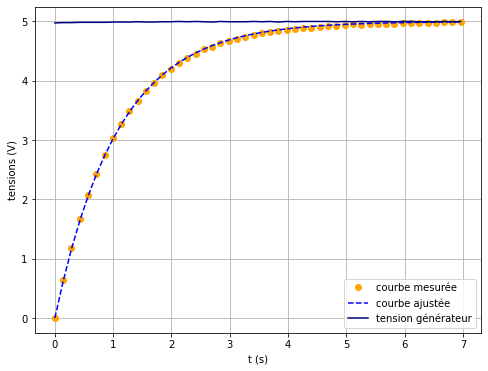

In [7]:
#  Graphe et modélisation
fig3 = plt.figure(figsize=(8,6))
plt.plot(t, uc, linestyle='', marker ='o', color ='orange', label = 'courbe mesurée')
plt.plot(t, fonct_ajust(np.array(t), *popt), 'b--', label = 'courbe ajustée')
plt.plot(t, E, color='navy', label = 'tension générateur')
plt.xlabel('t (s)')
plt.ylabel ('tensions (V)')
plt.legend()
plt.grid()
plt.show()

## Tracé des graphes $u_C = f(t)$ et $u_R = f(t)$ avec les tangentes 

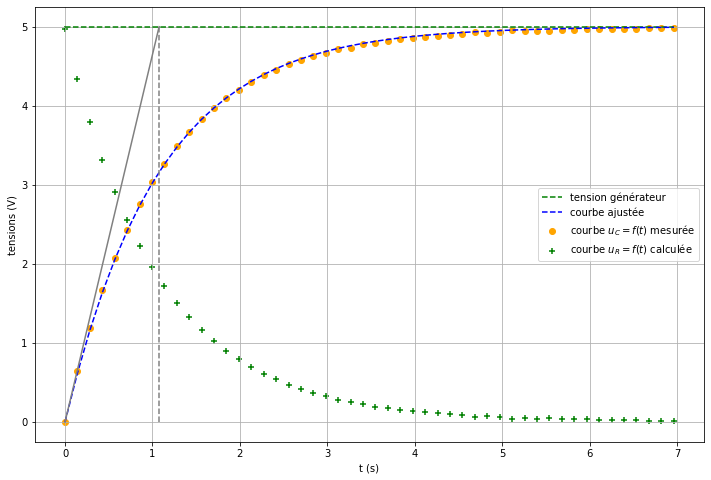

In [8]:
# Avec tracé de la tangente
tau = popt[0]
fig4 = plt.figure(figsize=(12,8))
plt.plot(t, [5.0 for e in t], color='green', linestyle='--', label = 'tension générateur')
plt.plot(t, fonct_ajust(np.array(t), *popt), 'b--', label = 'courbe ajustée')
plt.scatter(t, uc, marker='o', color = 'orange', label = 'courbe $u_C=f(t)$ mesurée')
plt.scatter(t, ur, marker='+', color = 'green', label = 'courbe $u_R=f(t)$ calculée')
plt.plot([0, tau], [0, 5], '-', color='grey')
plt.plot([tau, tau], [0, 5], '--', color='grey')
plt.xlabel('t (s)')
plt.ylabel ('tensions (V)')
plt.legend()
plt.grid()
plt.show()